**<font size="5"> Analysing and Cleaning the Dataset</font>**

In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
Iris_data=pd.read_csv(r"C:\Users\Dell\Downloads\iris_dataset.csv")

In [3]:
#Starting 5 values are visible here
Iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Gives the missing values
Iris_data.isnull()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [5]:
#Total number of values which are missing
Iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Here the missing values are 0. So, we don't have to fill them and we can go for the further steps

In [6]:
Iris_data.shape

(150, 5)

There are 150 rows and 5 columns

In [7]:
Iris_data["sepal length (cm)"].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

These are the unique values in sepal length

In [8]:
Iris_data["sepal width (cm)"].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

These are the unique values in Sepal Width

In [9]:
Iris_data["petal length (cm)"].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

These are the unique values in Petal length

In [10]:
Iris_data["petal width (cm)"].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

These are the unique values in Petal width.

In [11]:
Iris_data["target"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

These are the unique values in target.

In [12]:
#Checking for Duplicates
Iris_data.duplicated().sum()

np.int64(3)

In [13]:
#Drop the duplicates
Iris__data=Iris_data.drop_duplicates()

In [14]:
#Created a new dataset
Iris__data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Here we have created a new dataset with no duplicate values

In [15]:
#Check the duplicates in new dataset
Iris__data.duplicated().sum()

np.int64(0)

New dataset "Iris__data" has no duplicate values

In [16]:
#Check shape of the new dataset
Iris__data.shape

(147, 5)

The number of rows has changed now with 147 rows and 5 columns

**<font size="5">Encoding, Correlation and Dropping the columns</font>**

Firstly we'll encode the dataset which could be easily encoded and later on we are supposed to find the columns which are supposed to be dropped for which we need to find correlation. If correlation is more, then we can drop any one of the column which is not needed.

In [17]:
#Normal mapping for encoding
Mapping={'Iris-setosa': 0, 'Iris-versicolor':1, 'Iris-virginica':2}
Iris__data.loc[:,'target_Encoded']= Iris__data['target'].map(Mapping)

C:\Users\Dell\AppData\Local\Temp\ipykernel_9868\1733776329.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Iris__data.loc[:,'target_Encoded']= Iris__data['target'].map(Mapping)


Here we have mapped the values of target as 0,1,2 and used .loc as we were using a slice of the dataset

In [18]:
Iris__data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_Encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


Here we can check it has created a new column for target named "target_Encoded"

In [19]:
#drop the column target as we already have the encoded target column
Iris__data=Iris__data.drop(["target"],axis=1)

In [20]:
#Checking the dataframe again
Iris__data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_Encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now, We have dropped the column named "target" as it was not needed now.

In [21]:
#Correlation for the whole dataset
Iris__data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_Encoded
sepal length (cm),1.000000,-0.109321,0.871305,0.817058,0.782904
sepal width (cm),-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal length (cm),0.871305,-0.421057,1.000000,0.961883,0.948339
petal width (cm),0.817058,-0.356376,0.961883,1.000000,0.955693
target_Encoded,0.782904,-0.418348,0.948339,0.955693,1.000000


After studying the above correlation, we can easily specify that "target_Encoded" has the highest correlation with "petal width (cm)" around 0.95 and with "petal length (cm)" around 0.948. So, we can keep the highest collinearity and drop the other column which is "petal length (cm)"

In [22]:
Iris__data=Iris__data.drop(["petal length (cm)"],axis=1)

Now we'll find the correlation of "petal width (cm)" with other columns like "sepal length (cm)","sepal width (cm)".

In [23]:
Iris__data["petal width (cm)"].corr(Iris__data["sepal length (cm)"])

np.float64(0.8170583021640013)

In [24]:
Iris__data["petal width (cm)"].corr(Iris__data["sepal width (cm)"])

np.float64(-0.35637616036971614)

So, we have checked the correlation, the one which is more "sepal length (cm)" should be dropped because it has 0.81 as correlation which is very high

In [25]:
#dropping the sepal length column
Iris__data=Iris__data.drop(["sepal length (cm)"],axis=1)

In [26]:
#check for the updated dataframe
Iris__data

,sepal width (cm),petal width (cm),target_Encoded
0,3.5,0.2,0
1,3.0,0.2,0
2,3.2,0.2,0
3,3.1,0.2,0
4,3.6,0.2,0
...,...,...,...
145,3.0,2.3,2
146,2.5,1.9,2
147,3.0,2.0,2
148,3.4,2.3,2


So, the updated dataframe has three columns "sepal width (cm)", "petal width (cm)" and "target_Encoded"

<Axes: >

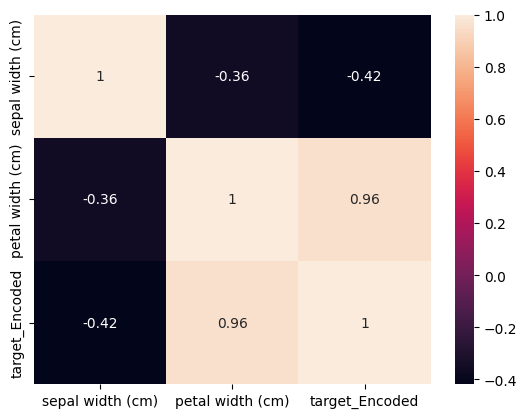

In [27]:
#Heatmap shows the correlation in visualized form
sns.heatmap(Iris__data.corr(),annot=True)

The above is the heatmap for the given dataframe

**<font size="5">Visualization</font>**

<Axes: title={'center': 'petal width'}, xlabel='petal width (cm)'>

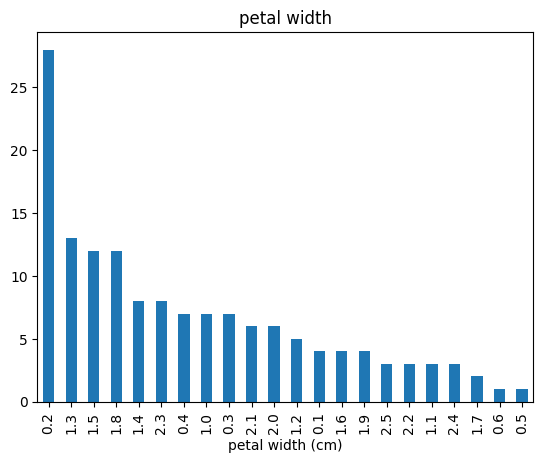

In [28]:
#Plotting the bar chart
Iris__data["petal width (cm)"].value_counts().plot.bar(title="petal width")

from the above graph , Maximum number of iris flower has 0.2cm of petal width and the minimum number of flower has 0.5 cm and 0.6cm of petal width

<Axes: title={'center': 'sepal width'}, xlabel='sepal width (cm)'>

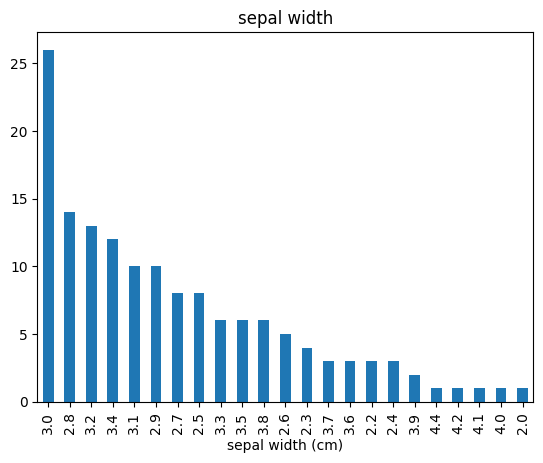

In [29]:
#Plotting the bar chart
Iris__data["sepal width (cm)"].value_counts().plot.bar(title="sepal width")

from the above graph , Maximum number of iris flower has 3.0 cm of sepal width and the minimum number of flower has 4.4cm,4.2cm,4.1cm,4.0cm and 2.0cm of sepal width

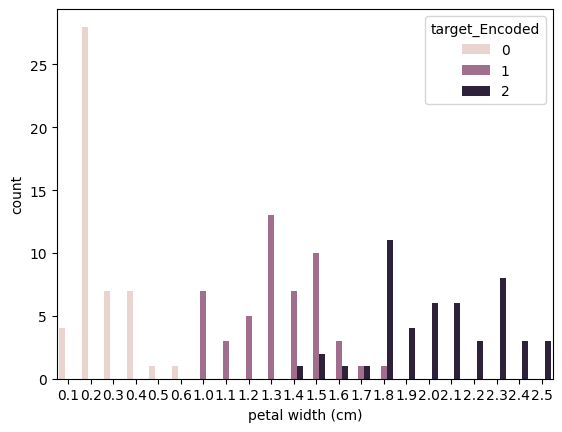

In [30]:
sns.countplot(x="petal width (cm)",hue="target_Encoded",data=Iris__data)
plt.show()

Highest petal width has "Iris-Setosa" species.

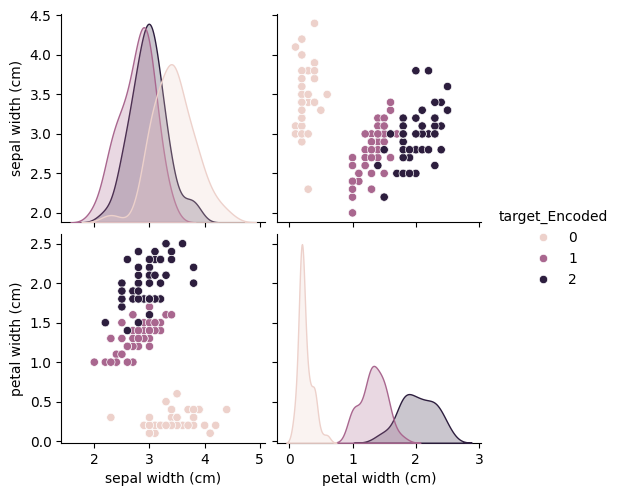

In [31]:
#plotting the pairplot
sns.pairplot(Iris__data,hue="target_Encoded")

The above graph easily shows us that 'Iris-setosa' has minimum sepal width (cm) whereas 'Iris-versicolor' and 'Iris-virginica' overlaps

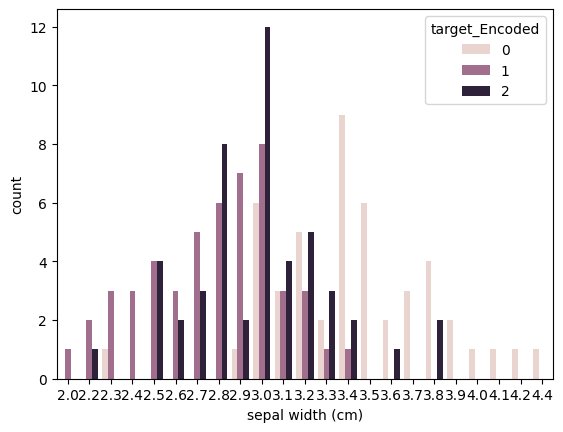

In [32]:
sns.countplot(x="sepal width (cm)",hue="target_Encoded",data=Iris__data)
plt.show()

'Iris-virginica' has highest sepal width and 'Iris-setosa' has lowest sepal width.

**<font size="5">Feature Scaling</font>**

In [33]:
#Importing the necessary libraries for preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [34]:
x=Iris__data.drop(["target_Encoded"],axis=1)

In [35]:
y=Iris__data["target_Encoded"]

In [36]:
#target/species data is stored in y
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target_Encoded, Length: 147, dtype: int64

In [37]:
#Shows starting 5 values of x
x.head()

,sepal width (cm),petal width (cm)
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2


In [38]:
#Splitting the dataset in feature class and target variable for training and testing
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [39]:
#X has data sepal width and petal width
X_train.shape

(102, 2)

X has 102 rows and 2 columns for training set

In [40]:
#Checking the shape for testing set in X
X_test.shape

(45, 2)

X has 45 rows and 2 columns in testing set

In [41]:
#Checking the shape for Y for training set
y_train.shape

(102,)

y has 102 values in training set

In [42]:
#Checking the shape for Y in training set
y_test.shape

(45,)

y has 45 values in test set

In [43]:
#We'll do standard scaling for the given dataset
ss= StandardScaler()
ss.fit_transform(X_train)
ss.transform(X_test)


array([[-0.48210771,  0.34681885],
       [-0.48210771,  0.07882246],
       [-0.03908981, -1.26115944],
       [-0.26059876,  0.07882246],
       [ 1.73298177, -1.26115944],
       [-0.48210771,  0.07882246],
       [ 0.84694598, -1.39515763],
       [-0.26059876,  0.34681885],
       [ 0.18241913,  0.74881342],
       [-0.03908981,  1.41880437],
       [ 0.18241913,  1.55280256],
       [-0.03908981,  0.34681885],
       [-0.03908981, -1.39515763],
       [-0.03908981, -1.39515763],
       [ 1.73298177,  1.28480618],
       [-0.03908981,  0.34681885],
       [ 1.73298177, -1.26115944],
       [-0.03908981,  0.61481523],
       [ 1.51147282, -1.12716125],
       [ 0.18241913, -1.39515763],
       [-1.8111614 , -0.32317211],
       [ 1.06845492, -1.39515763],
       [ 0.84694598, -1.39515763],
       [ 0.62543703,  0.48081704],
       [-0.03908981, -1.52915582],
       [ 1.95449072, -1.12716125],
       [ 0.40392808,  1.41880437],
       [ 0.84694598, -1.39515763],
       [ 0.40392808,

**<font size="5"> K-NN Model</font>**

In [44]:
#import the KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix

In [45]:
#initialise  and train the knn  model
knn=KNeighborsClassifier(n_neighbors=3)

In [46]:
#fit the training and testing data in KNN model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [47]:
#Now let's find the predicted value  for y
y_pred=knn.predict(X_test)

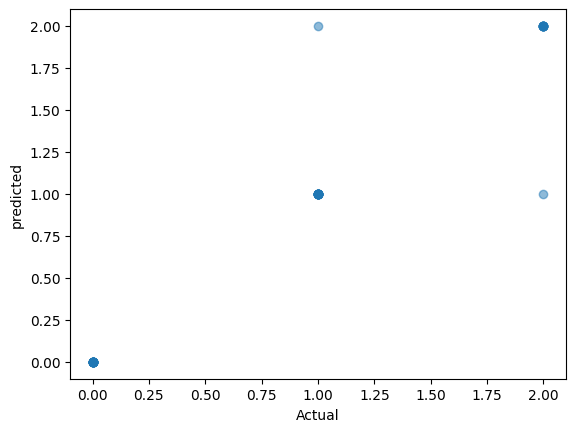

In [48]:
#lets make a scatter plot to visualize our model outputs
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

So,from the above scatter plot we can easily see 3 values are predicted correct (0.00,0.00), (1.00,1.00),(2.00,2,00) and wrongly predicted is (2.00,1.00)

In [49]:
#Accuracy with predicted and actual value
("ACCURACY=",accuracy_score(y_test,y_pred))

('ACCURACY=', 0.9555555555555556)

So,the accuracy is 0.95

In [50]:
#precision score
precision_score(y_test,y_pred,average='weighted')

0.9555555555555556

Weighted Average precision score is 0.95

In [51]:
#recall score
recall_score(y_test,y_pred,average='weighted')

0.9555555555555556

Weighted Average Recall score is 0.95

In [52]:
#Confusion_matrix 
confusion_matrix(y_test,y_pred)

array([[17,  0,  0],
       [ 0, 16,  1],
       [ 0,  1, 10]])

In the first case, all 17 values are correctly predicted in class 0,
In the second case , 16 values are correctly predicted and 1 value is incorrectly predicted in class 1,
In the third case, 10 are correct but 1 are wrongly predicted in class 2.


In [53]:
#Classification_report for the dataset
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        17\n           1       0.94      0.94      0.94        17\n           2       0.91      0.91      0.91        11\n\n    accuracy                           0.96        45\n   macro avg       0.95      0.95      0.95        45\nweighted avg       0.96      0.96      0.96        45\n'

From the above classification report, we can easily see </br>
for class 0, </br>
precision= 1 </br>
recall=1</br>
f1-score=1

for class 1,</br>
precision=0.94 </br>
recall=0.94 </br>
f1-score=0.94

for class 2,</br>
precision= 0.91 </br>
recall=0.91  </br>
f1-score=0.91

